In [1]:
import pandas as pd

In [2]:
df_tt1=pd.read_csv('https://raw.githubusercontent.com/sukantasuhrid/project_pds_24/refs/heads/main/term-test-1-result.csv')
df_tt2=pd.read_csv('https://raw.githubusercontent.com/sukantasuhrid/project_pds_24/refs/heads/main/term-test-2-result.csv')
df_tt1.head()
df_tt2.head()

,Registration No.,Name,TT-2 Marks
0,20241001,Arafat Hossain,16
1,20241002,Mehedi Hasan,17
2,20241003,Tanjim Ahmed,14
3,20241004,Sabbir Rahman,19
4,20241005,Nafisa Islam,15


In [3]:
df_merged=pd.merge(df_tt1, df_tt2)
df_merged.head()

,Registration No.,Name,TT-1 Marks,TT-2 Marks
0,20241001,Arafat Hossain,18,16
1,20241002,Mehedi Hasan,15,17
2,20241003,Tanjim Ahmed,12,14
3,20241004,Sabbir Rahman,17,19
4,20241005,Nafisa Islam,19,15


In [4]:
df_merged["Best Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].max(axis=1)


df_merged["Average Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].mean(axis=1)

df_merged.head()


,Registration No.,Name,TT-1 Marks,TT-2 Marks,Best Marks,Average Marks
0,20241001,Arafat Hossain,18,16,18,17.0
1,20241002,Mehedi Hasan,15,17,17,16.0
2,20241003,Tanjim Ahmed,12,14,14,13.0
3,20241004,Sabbir Rahman,17,19,19,18.0
4,20241005,Nafisa Islam,19,15,19,17.0


In [5]:
df_merged.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
df_merged.head()

,Registration No.,Name,Best Marks,Average Marks
0,20241001,Arafat Hossain,18,17.0
1,20241002,Mehedi Hasan,17,16.0
2,20241003,Tanjim Ahmed,14,13.0
3,20241004,Sabbir Rahman,19,18.0
4,20241005,Nafisa Islam,19,17.0


In [6]:
df_final=pd.read_csv('https://raw.githubusercontent.com/sukantasuhrid/project_pds_24/refs/heads/main/attendance-term-final-result.csv')
df_final.head()

,Registration No.,Name,Attendance Marks,Term Final Marks
0,20241001,Arafat Hossain,9,90
1,20241002,Mehedi Hasan,6,69
2,20241003,Tanjim Ahmed,9,75
3,20241004,Sabbir Rahman,6,63
4,20241005,Nafisa Islam,8,70


In [7]:
df_merged2=pd.merge(df_merged, df_final)
df_merged2.head()

,Registration No.,Name,Best Marks,Average Marks,Attendance Marks,Term Final Marks
0,20241001,Arafat Hossain,18,17.0,9,90
1,20241002,Mehedi Hasan,17,16.0,6,69
2,20241003,Tanjim Ahmed,14,13.0,9,75
3,20241004,Sabbir Rahman,19,18.0,6,63
4,20241005,Nafisa Islam,19,17.0,8,70


In [8]:
df_merged2['Final Marks']=df_merged2['Term Final Marks']*0.7+df_merged2['Average Marks']+df_merged2['Attendance Marks']
df_merged2.head()

,Registration No.,Name,Best Marks,Average Marks,Attendance Marks,Term Final Marks,Final Marks
0,20241001,Arafat Hossain,18,17.0,9,90,89.0
1,20241002,Mehedi Hasan,17,16.0,6,69,70.3
2,20241003,Tanjim Ahmed,14,13.0,9,75,74.5
3,20241004,Sabbir Rahman,19,18.0,6,63,68.1
4,20241005,Nafisa Islam,19,17.0,8,70,74.0


In [9]:
df_merged2.to_csv('final result.csv', index=False)
df_finalresult=pd.read_csv('/content/final result.csv')
df_finalresult.head()

,Registration No.,Name,Best Marks,Average Marks,Attendance Marks,Term Final Marks,Final Marks
0,20241001,Arafat Hossain,18,17.0,9,90,89.0
1,20241002,Mehedi Hasan,17,16.0,6,69,70.3
2,20241003,Tanjim Ahmed,14,13.0,9,75,74.5
3,20241004,Sabbir Rahman,19,18.0,6,63,68.1
4,20241005,Nafisa Islam,19,17.0,8,70,74.0


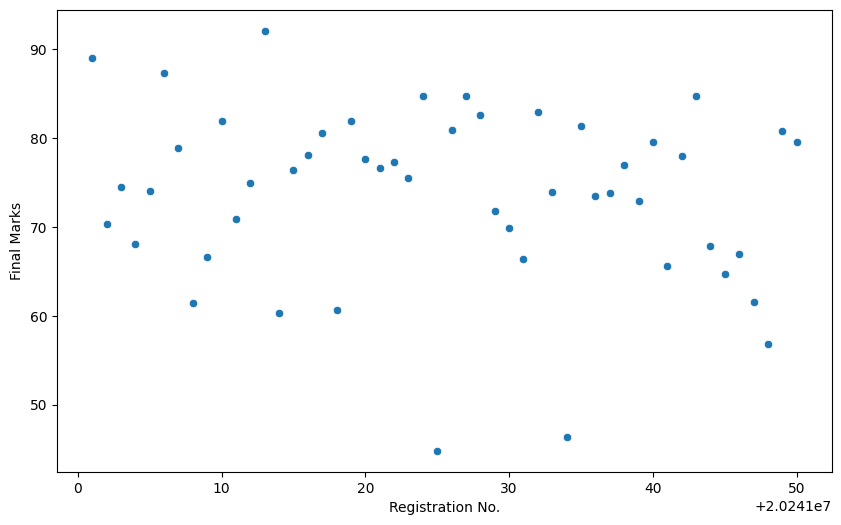

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = df_finalresult[['Registration No.', 'Final Marks']].values
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:, 1])
plt.xlabel('Registration No.')
plt.ylabel('Final Marks')
plt.show()

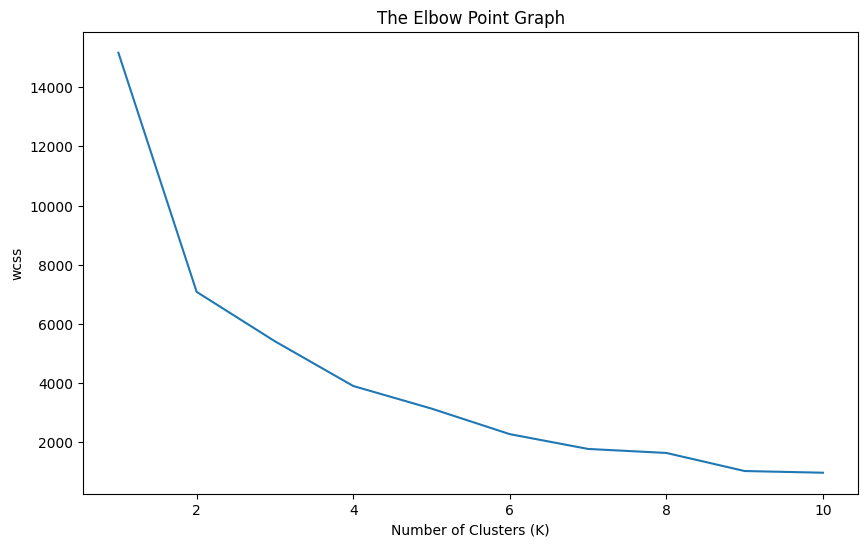

In [11]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

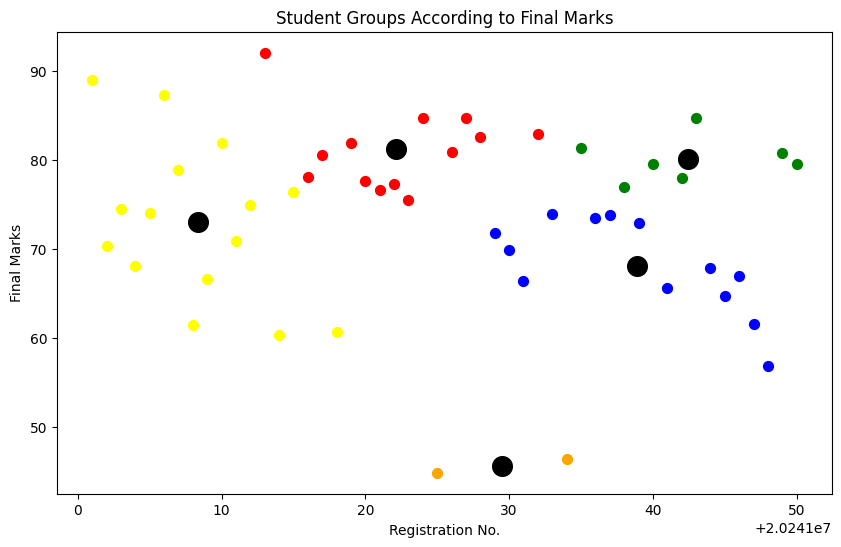

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.title('Student Groups According to Final Marks')
plt.xlabel('Registration No.')
plt.ylabel('Final Marks')
plt.show()